# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Hasbi Ardianto Pratama]
- **Email:** [rdnthasbi@gmail.com]
- **ID Dicoding:** [hasbiardi1]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa pemesanan barang dari tahun 2016 sampai tahun 2018?
- Metode pembayaran apa yang paling digunakan untuk order?

## Import Semua Packages/Library yang Digunakan

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unidecode import unidecode

## Data Wrangling

### Gathering Data

Menggunakan dataset yang sudah di download dan di simpan di folder `data`

In [2]:
customers_df = pd.read_csv("data\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("data\olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("data\olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("data\olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data\olist_orders_dataset.csv")
products_df = pd.read_csv("data\olist_products_dataset.csv")
sellers_df = pd.read_csv("data\olist_sellers_dataset.csv")
product_category_translation_df = pd.read_csv("data\product_category_name_translation.csv")

### Assessing Data

Mengambil informasi dari dataset

In [3]:
customers_df.info()
geolocation_df.info()
order_items_df.info()
order_payments_df.info()
order_reviews_df.info()
orders_df.info()
products_df.info()
sellers_df.info()
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [4]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  261831
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [5]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [7]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Cleaning Data

Mengubah data string object ke datetime.

In [8]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders_df[col]=pd.to_datetime(orders_df[col])

In [9]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    order_reviews_df[col]=pd.to_datetime(order_reviews_df[col])

In [10]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    order_items_df[col]=pd.to_datetime(order_items_df[col])

Menghapus data-data duplikat

In [11]:
geolocation_df.duplicated().sum()

261831

In [12]:
geolocation_df.drop_duplicates(inplace=True)

In [13]:
geolocation_df.duplicated().sum()

0

Pada dataset `order` dan `product` tidak dihilangkan nilai _null_-nya agar data yang penting tidak hilang terlalu banyak

In [14]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Membersihkan data _null_ yang ada di dataset `order_reviews`

In [16]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengubah nilai _null_ menjadi _`untilted`_ dan _`No Message`_

In [17]:
order_reviews_df["review_comment_title"].fillna("Untilted", inplace=True)
order_reviews_df["review_comment_message"].fillna("No Message", inplace=True)

Hasil setelah dilakukan pembersihan

In [18]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore **orders_df**

In [19]:
orders_df['order_purchase_timestamp'].sort_values(ascending=True)

4541    2016-09-04 21:15:19
4396    2016-09-05 00:15:34
10071   2016-09-13 15:24:19
30710   2016-09-15 12:16:38
83078   2016-10-02 22:07:52
                ...        
50387   2018-09-29 09:13:03
88500   2018-10-01 15:30:09
31891   2018-10-03 18:55:29
68373   2018-10-16 20:16:02
60938   2018-10-17 17:30:18
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

Mengambil order yang hanya berstatus `delivered`

In [20]:
delivered_order_df = orders_df[orders_df['order_status']=='delivered']

Mengambil data tahun pada tipe data timestamp 

In [21]:
delivered_order_df['order_purchase_year'] = delivered_order_df['order_purchase_timestamp'].dt.year

C:\Users\hasbi\AppData\Local\Temp\ipykernel_11072\2627123464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order_df['order_purchase_year'] = delivered_order_df['order_purchase_timestamp'].dt.year


In [22]:
delivered_order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018


Menghitung rata-rata order per tahun

In [23]:
mean_orders_year = delivered_order_df.groupby('order_purchase_year')['order_id'].nunique()

In [24]:
mean_orders_year

order_purchase_year
2016      267
2017    43428
2018    52783
Name: order_id, dtype: int64

### Explore **customers_df**

In [25]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Customer memiliki dua id yang unik

In [26]:
customers_df.duplicated().sum()

0

Tidak ada nilai id yang sama

In [27]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Customer dari `sao paulo` yang paling banyak berasal

In [28]:
customers_df.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Expore **geolocation_df**

In [29]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Kota terbanyak berada di kota `sao paulo`

In [30]:
geolocation_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,79926
1,rio de janeiro,RJ,35175
2,são paulo,SP,19717
3,belo horizonte,MG,19474
4,curitiba,PR,11263
...,...,...,...
8458,damião,PB,1
8459,davinópolis,GO,1
8460,são camilo,PR,1
8461,nova redencao bahia,BA,1


karena `sao paulo` terdapat dua data yang berbeda karena penulisan dengan format yang berbeda. Perlunya mengganti kata ejaan `são paulo` menjadi `sao paulo` menggunakan library unidecode 

In [34]:
geolocation_df['geolocation_city']=geolocation_df['geolocation_city'].apply(lambda x: unidecode(x))

In [35]:
geolocation_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


### Explore **orders_payment_df**

In [36]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [37]:
payment_type_df = order_payments_df.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

In [38]:
payment_type_df

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

In [45]:
payment_type_df.to_csv('payment_type.csv')

In [46]:
mean_orders_year.to_csv('orders_per_year.csv')

## Visualization & Explanatory Analysis

### Performa pemesanan barang dari tahun 2016 sampai tahun 2018?

In [40]:
mean_orders_year

order_purchase_year
2016      267
2017    43428
2018    52783
Name: order_id, dtype: int64

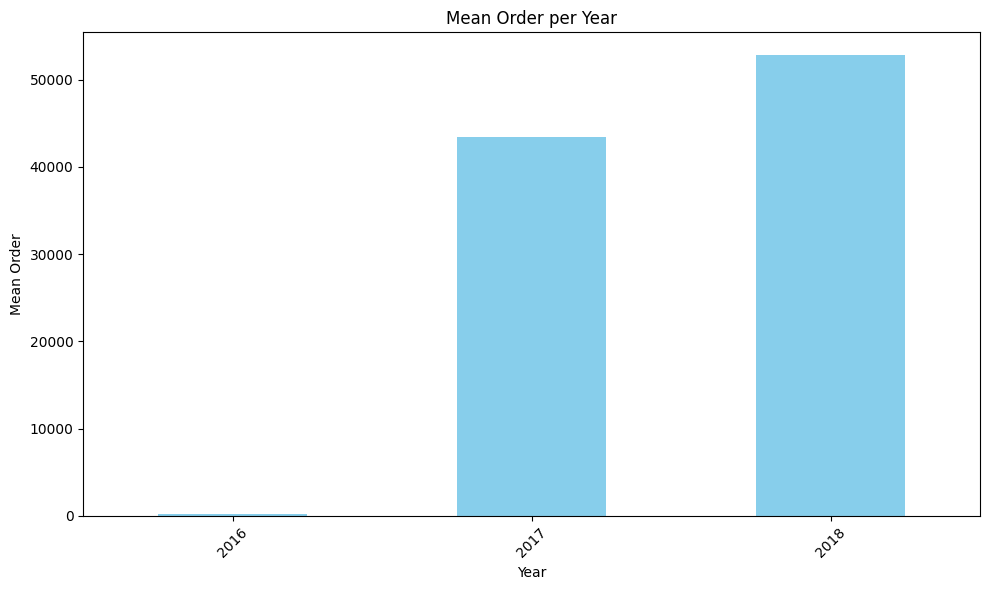

In [41]:
plt.figure(figsize=(10, 6))
mean_orders_year.plot(kind='bar', color='skyblue')
plt.title('Mean Order per Year')
plt.xlabel('Year')
plt.ylabel('Mean Order',)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Metode pembayaran apa yang paling sering digunakan untuk order?

In [42]:
payment_type_df

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

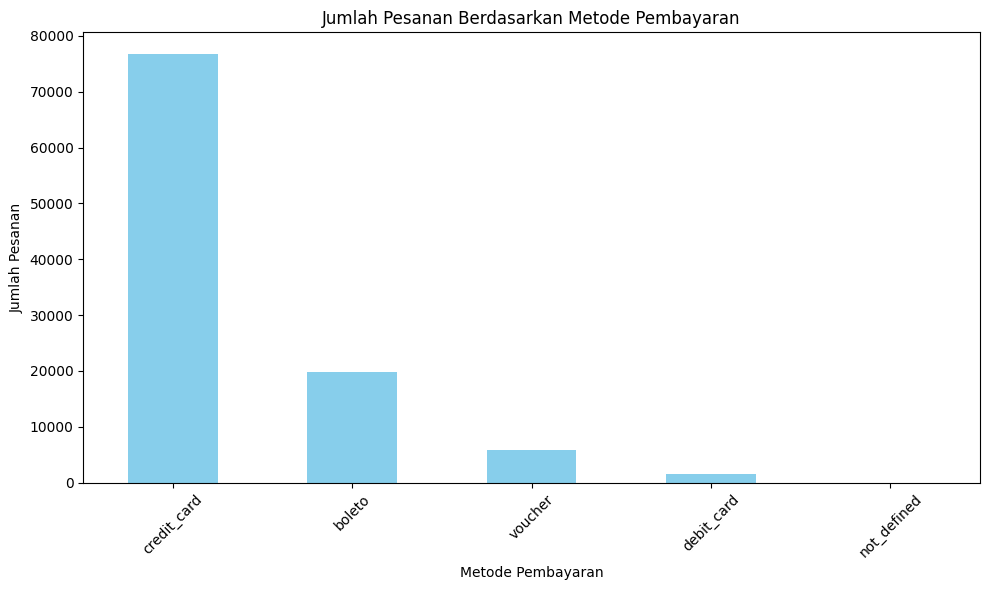

In [43]:
plt.figure(figsize=(10, 6))
payment_type_df.plot(kind='bar', color='skyblue')
plt.title('Jumlah Pesanan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Performa pemesanan barang mengalami kenaikan dari tahun 2016 yang hanya `267` sampai tahun 2018 yang mencapai `52783` yang berarti performa pemesanan barang naik hingga `19668%`

- `Kartu Kredit` menjadi salah satu cara pembayaran yang paling banyak digunakan. Karena kemudahannya dalam bertransaksi dimana saja 